In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, \
classification_report, log_loss, f1_score, recall_score,\
mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier
!pip install xgboost
import xgboost as xgb


In [2]:
df=pd.read_csv(r'G:\machinelearning\Mall_Customers.csv')

In [3]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [8]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df=df.drop('CustomerID',axis=1)

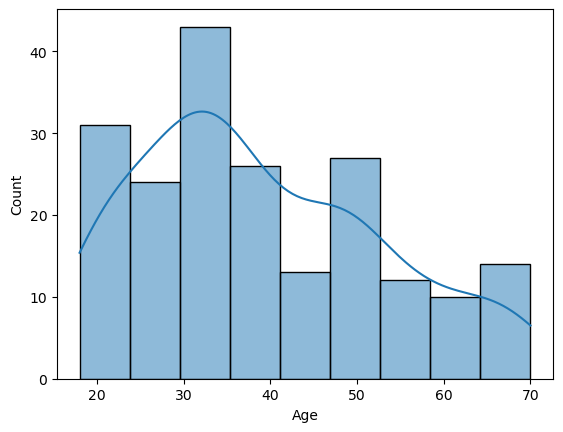

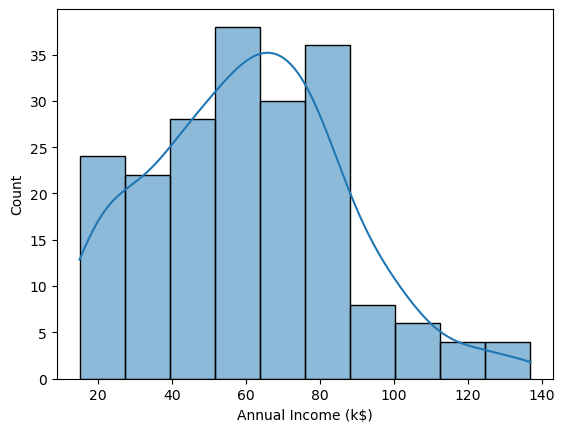

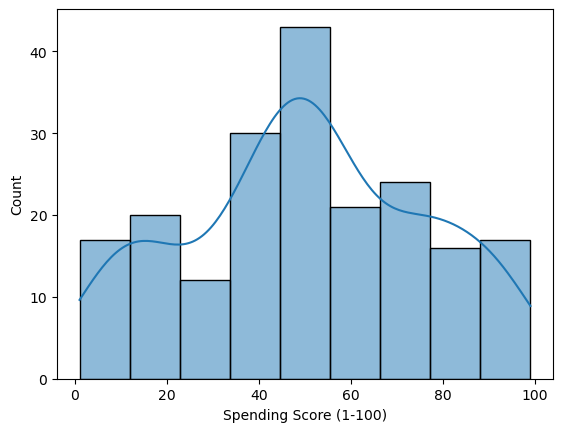

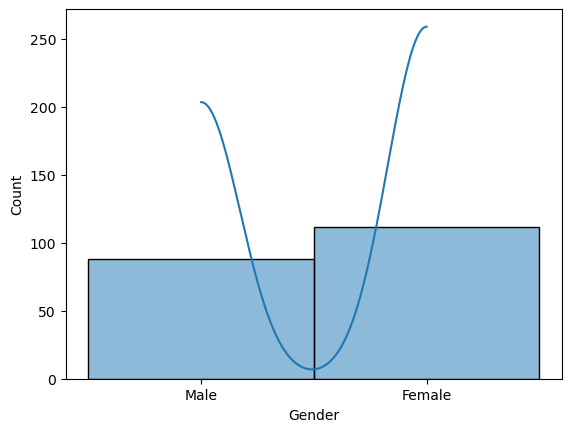

In [10]:
numcol=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)','Gender']
for i in numcol:
    sns.histplot(df[i],kde=True)
    plt.show()

In [11]:
df.groupby('Gender')[['Spending Score (1-100)','Annual Income (k$)','Age']].mean()

,Spending Score (1-100),Annual Income (k$),Age
Gender,,,
Female,51.526786,59.250000,38.098214
Male,48.511364,62.227273,39.806818


<Axes: xlabel='Gender', ylabel='count'>

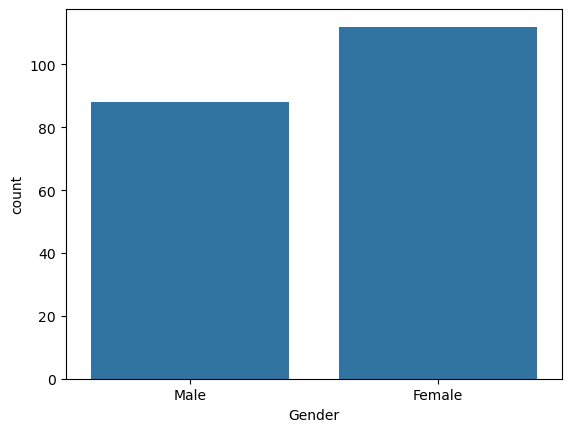

In [12]:
sns.countplot(x='Gender',data=df)

In [13]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [14]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


C:\Users\home\AppData\Local\Temp\ipykernel_10584\2939811649.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_age = df.groupby('age')['Annual Income (k$)'].sum().reset_index()


<Axes: xlabel='age', ylabel='Annual Income (k$)'>

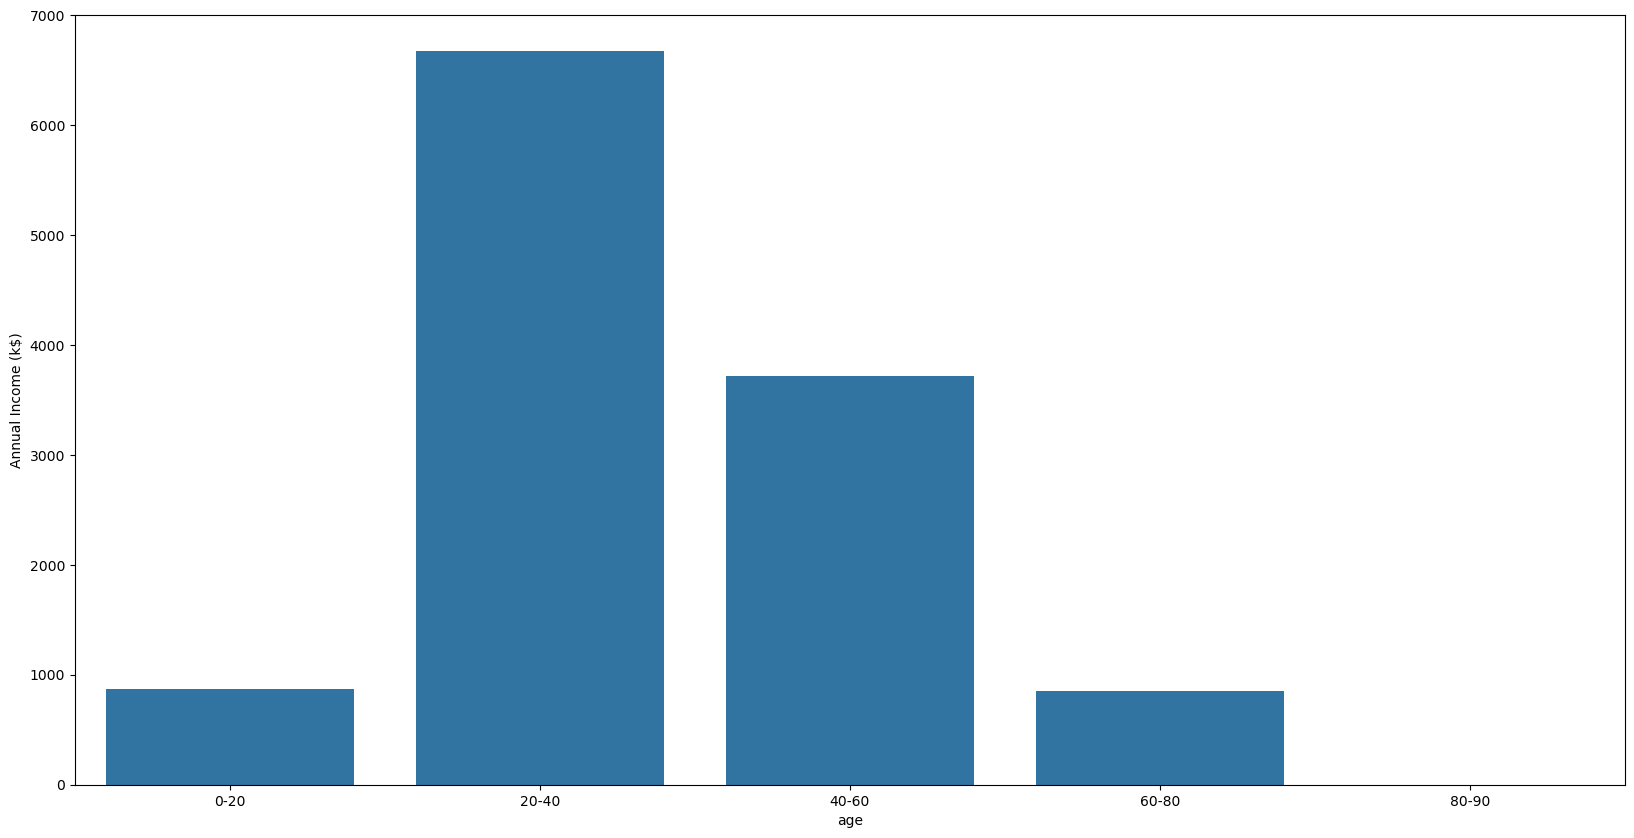

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
age_bin=[0,20,40,60,80,90]
age_lables=['0-20','20-40','40-60','60-80','80-90']
df['age']=pd.cut(df['Age'],bins=age_bin,labels=age_lables)
#sum of salary by age bin
salary_by_age = df.groupby('age')['Annual Income (k$)'].sum().reset_index()
sns.barplot(x='age', y='Annual Income (k$)', data=salary_by_age)

C:\Users\home\AppData\Local\Temp\ipykernel_10584\445608443.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_age = df.groupby('age')['Spending Score (1-100)'].sum().reset_index()


<Axes: xlabel='age', ylabel='Spending Score (1-100)'>

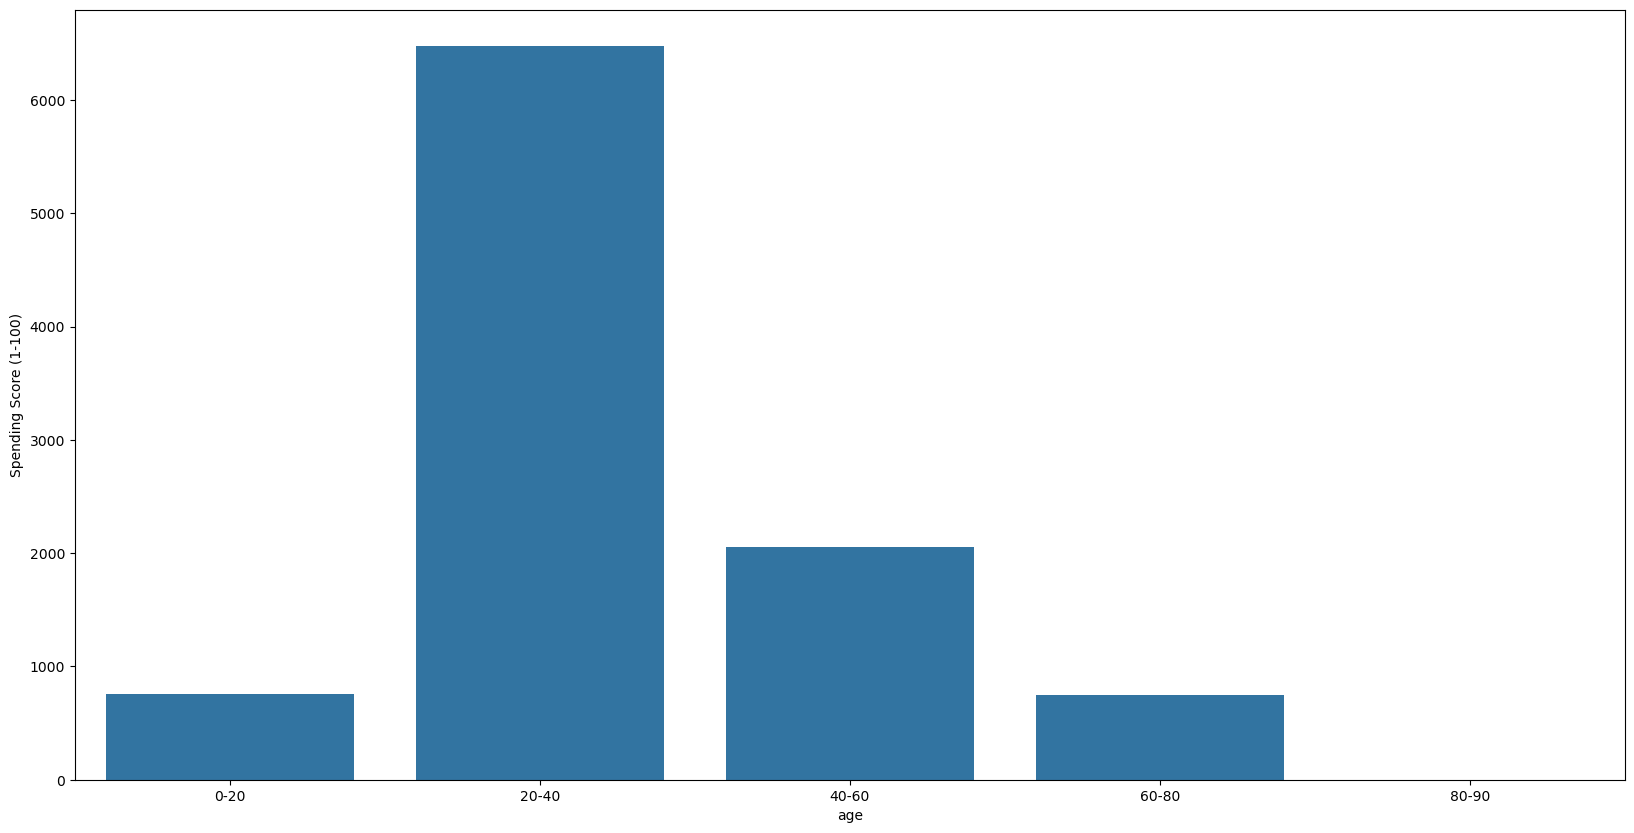

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
age_bin=[0,20,40,60,80,90]
age_lables=['0-20','20-40','40-60','60-80','80-90']
df['age']=pd.cut(df['Age'],bins=age_bin,labels=age_lables)
#sum of salary by age bin
salary_by_age = df.groupby('age')['Spending Score (1-100)'].sum().reset_index()
sns.barplot(x='age', y='Spending Score (1-100)',data=salary_by_age)

In [17]:
num_col=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
corr_matrix=df[num_col].corr()

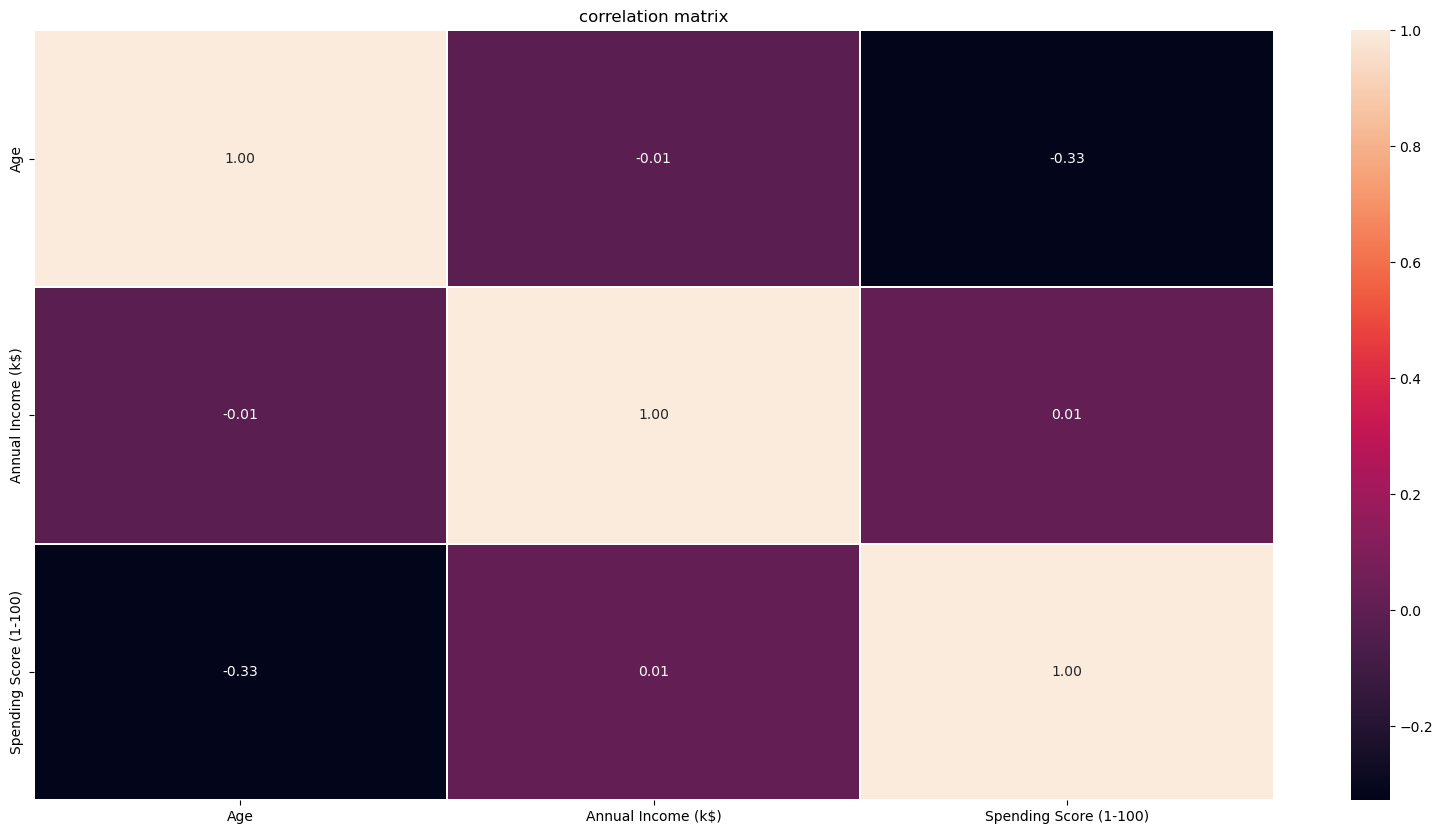

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',linewidth=0.2)
plt.title('correlation matrix')
plt.show()

In [19]:
df=df.rename(columns={'Spending Score (1-100)':'score'})

In [20]:
#train test
x=df[['Gender', 'Age', 'Annual Income (k$)']]
y=df[['score']]

In [21]:
x.head(),x.shape

(   Gender  Age  Annual Income (k$)
 0       0   19                  15
 1       0   21                  15
 2       1   20                  16
 3       1   23                  16
 4       1   31                  17,
 (200, 3))

In [22]:
y.head(),y.shape

(   score
 0     39
 1     81
 2      6
 3     77
 4     40,
 (200, 1))

In [23]:
 
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.3,random_state=42)
xtr.shape,ytr.shape

((140, 3), (140, 1))

In [24]:
lr=LinearRegression()
lr.fit(xtr,ytr)

LinearRegression()

In [25]:
rf=RandomForestRegressor(random_state=42)
rf.fit(xtr,ytr)

C:\Users\home\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [26]:
ypred_lr = lr.predict(xts)
ypred_rf = rf.predict(xts)

In [27]:
def model(predicted):
    rmse = mean_squared_error( yts,predicted, squared= False)
    mae = mean_absolute_error( yts,predicted)
    r2 = r2_score(predicted, yts)
    
    print('Root Mean Squared Error: ', rmse)
    print('Mean Absolute Error: ', mae)
    print('R2 Score: ', r2)

In [30]:
print('Linear regression:\n')
model(ypred_lr)
print('\nRnadom forest method:')
model(ypred_rf)


Linear regression:

Root Mean Squared Error:  22.91769081655535
Mean Absolute Error:  19.06031176341787
R2 Score:  -8.47002343187815

Rnadom forest method:
Root Mean Squared Error:  21.0902815919398
Mean Absolute Error:  13.351541666666668
R2 Score:  -0.36996496690549385


C:\Users\home\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\home\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
# Classification Task
def catagory(score):
    if score<=33:
        return 'Low'
    elif score>33 and score <=66:
        return 'Medium'
    else:
        return 'High'

In [32]:
df['spending cat']=df['score'].apply(catagory)

In [69]:
xc=df[['Gender','Age','Annual Income (k$)']]
yc=df['spending cat']
xctr,xcts,yctr,ycts=train_test_split(xc,yc,test_size=0.2,random_state=0)

In [70]:
from sklearn.linear_model import LogisticRegression
clr=LogisticRegression()
clr.fit(xctr,yctr)

C:\Users\home\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
ypred_lrc=clr.predict(xcts)


In [72]:
print("Logistic Regression Classification Report:")
print(classification_report(ycts, ypred_lrc))
print("model accuracy score:")
print(accuracy_score(ycts,ypred_lrc))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.70      0.50      0.58        14
         Low       0.67      0.18      0.29        11
      Medium       0.48      0.87      0.62        15

    accuracy                           0.55        40
   macro avg       0.62      0.52      0.50        40
weighted avg       0.61      0.55      0.51        40

model accuracy score:
0.55
